# Predictive Analytics in Human Resources
To estimate Employee Attrition & YearsAtCompany from given data


In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, Normalizer, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
tf.keras.backend.clear_session()

In [3]:
pd.options.display.max_columns = 500
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
#print("Train data: ")
#df.isna().sum()

In [5]:
#print("Test data: ")
#df_test.isna().sum()

In [6]:
#Replacing nan values by mean
df.fillna(df.mean(), inplace = True)
df_test.fillna(df_test.mean(), inplace = True)

In [7]:
df

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,CommunicationSkill,Behaviour,Experience,LvlGrownInOrg,ContributionIndex,TechnicalExpertise,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,Travel_Rarely,1376.0,Human Resources,1,Male,91.0,2.0,3,Human Resources,1.0,Married,10482,2326.0,9.0,Y,No,14.0,3,4,1,46116,4.0,9632,9,4.0,80,1,24.0,1,2.0,Medical,1,1098,2.0,3.0,6,3.0,6,0,15.0,1,20
1,2,25.0,Non-Travel,675.0,Research & Development,5,Male,85.0,4.0,2,Healthcare Representative,1.0,Divorced,4000,18384.0,1.0,Y,No,12.0,3,5,1,10635,6.0,4725,7,4.0,80,2,6.0,2,2.0,Life Sciences,1,369,2.0,3.0,3,1.0,5,0,7.0,0,6
2,3,57.0,Travel_Rarely,210.0,Sales,29,Male,56.0,2.0,4,Manager,4.0,Divorced,14118,22102.0,3.0,Y,No,12.0,3,2,1,36537,2.0,1470,0,3.0,80,1,32.0,3,3.0,Marketing,1,568,1.0,2.0,0,0.0,0,0,3.0,0,1
3,4,47.0,Travel_Rarely,1180.0,Research & Development,25,Male,84.0,3.0,3,Healthcare Representative,3.0,Single,8633,13084.0,2.0,Y,No,23.0,4,1,1,814,3.0,8260,11,2.0,80,0,25.0,3,3.0,Medical,1,1993,1.0,3.0,14,12.0,11,0,14.0,0,17
4,5,22.0,Travel_Rarely,391.0,Research & Development,7,Male,75.0,3.0,1,Research Scientist,2.0,Single,2472,26092.0,1.0,Y,Yes,23.0,4,3,1,46742,2.0,2737,0,1.0,80,0,1.0,2,1.0,Life Sciences,1,1878,4.0,3.0,0,0.0,0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,Travel_Rarely,806.0,Research & Development,7,Female,39.0,3.0,1,Laboratory Technician,3.0,Divorced,3339,17285.0,3.0,Y,Yes,13.0,3,5,1,17742,6.0,5642,6,1.0,80,2,10.0,2,3.0,Technical Degree,1,1299,2.0,3.0,7,7.0,7,0,20.0,1,7
1226,1227,41.0,Travel_Rarely,582.0,Research & Development,28,Female,60.0,2.0,4,Manufacturing Director,2.0,Married,13570,5640.0,0.0,Y,No,23.0,4,2,1,43074,2.0,4074,70,3.0,80,1,21.0,3,4.0,Life Sciences,1,2034,1.0,3.0,7,0.0,10,0,9.0,0,20
1227,1228,36.0,Travel_Rarely,1456.0,Sales,13,Male,96.0,2.0,2,Sales Executive,1.0,Divorced,6134,8658.0,5.0,Y,Yes,13.0,3,3,1,41358,6.0,10192,1,2.0,80,3,16.0,3,5.0,Marketing,1,1733,2.0,3.0,2,2.0,2,0,15.0,1,2
1228,1229,23.0,Travel_Rarely,885.0,Research & Development,4,Male,58.0,4.0,1,Research Scientist,1.0,Married,2819,8544.0,2.0,Y,No,16.0,3,2,1,8520,1.0,6195,4,1.0,80,1,5.0,3,3.0,Medical,1,705,1.0,4.0,2,0.0,2,0,15.0,0,3


In [8]:
#Dropping redundant features
df.drop(["Over18","ID","FormalWarnings","EmployeeCount","StandardHours","Behaviour","EmployeeNumber"], axis = 1, inplace = True)
df_test.drop(["Over18","ID","FormalWarnings","EmployeeCount","StandardHours","Behaviour","EmployeeNumber"], axis = 1, inplace = True)

# Label-Encoding
Replacing categorical data by assigning integer labels

In [9]:
label_encoder = LabelEncoder()
def data_cleaning(df):
    df_ = df.copy()
    to_encode = ["BusinessTravel","Department","Gender","JobRole","MaritalStatus","OverTime","EducationField"]
    for column in to_encode:
        df_[column] = label_encoder.fit_transform(df_[column])
    return df_

In [10]:
df_lencoded = data_cleaning(df)
df_test_lencoded = data_cleaning(df_test)
df_lencoded

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,CommunicationSkill,Experience,LvlGrownInOrg,ContributionIndex,TechnicalExpertise,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Education,EducationField,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed,Attrition,YearsAtCompany
0,44.0,2,1376.0,0,1,1,91.0,2.0,3,1,1.0,1,10482,2326.0,9.0,0,14.0,3,4,46116,4.0,9632,9,4.0,1,24.0,1,2.0,3,2.0,3.0,6,3.0,6,15.0,1,20
1,25.0,0,675.0,1,5,1,85.0,4.0,2,0,1.0,0,4000,18384.0,1.0,0,12.0,3,5,10635,6.0,4725,7,4.0,2,6.0,2,2.0,1,2.0,3.0,3,1.0,5,7.0,0,6
2,57.0,2,210.0,2,29,1,56.0,2.0,4,3,4.0,0,14118,22102.0,3.0,0,12.0,3,2,36537,2.0,1470,0,3.0,1,32.0,3,3.0,2,1.0,2.0,0,0.0,0,3.0,0,1
3,47.0,2,1180.0,1,25,1,84.0,3.0,3,0,3.0,2,8633,13084.0,2.0,0,23.0,4,1,814,3.0,8260,11,2.0,0,25.0,3,3.0,3,1.0,3.0,14,12.0,11,14.0,0,17
4,22.0,2,391.0,1,7,1,75.0,3.0,1,6,2.0,2,2472,26092.0,1.0,1,23.0,4,3,46742,2.0,2737,0,1.0,0,1.0,2,1.0,1,4.0,3.0,0,0.0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,29.0,2,806.0,1,7,0,39.0,3.0,1,2,3.0,0,3339,17285.0,3.0,1,13.0,3,5,17742,6.0,5642,6,1.0,2,10.0,2,3.0,5,2.0,3.0,7,7.0,7,20.0,1,7
1226,41.0,2,582.0,1,28,0,60.0,2.0,4,4,2.0,1,13570,5640.0,0.0,0,23.0,4,2,43074,2.0,4074,70,3.0,1,21.0,3,4.0,1,1.0,3.0,7,0.0,10,9.0,0,20
1227,36.0,2,1456.0,2,13,1,96.0,2.0,2,7,1.0,0,6134,8658.0,5.0,1,13.0,3,3,41358,6.0,10192,1,2.0,3,16.0,3,5.0,2,2.0,3.0,2,2.0,2,15.0,1,2
1228,23.0,2,885.0,1,4,1,58.0,4.0,1,6,1.0,1,2819,8544.0,2.0,0,16.0,3,2,8520,1.0,6195,4,1.0,1,5.0,3,3.0,3,1.0,4.0,2,0.0,2,15.0,0,3


In [11]:
d = train_set = df_lencoded.drop(["Attrition", "YearsAtCompany"], axis = 1)
label_set_1 = df_lencoded[["Attrition"]]
label_set_2 = df_lencoded[["YearsAtCompany"]]

train_set = np.array(train_set)
label_set_1 = np.array(label_set_1)
label_set_2 = np.array(label_set_2)

print(train_set.shape,label_set_1.shape,label_set_2.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(1230, 35) (1230, 1) (1230, 1)


# Graphs
To understand the relation of Attrition & YearsAtCompany to other features

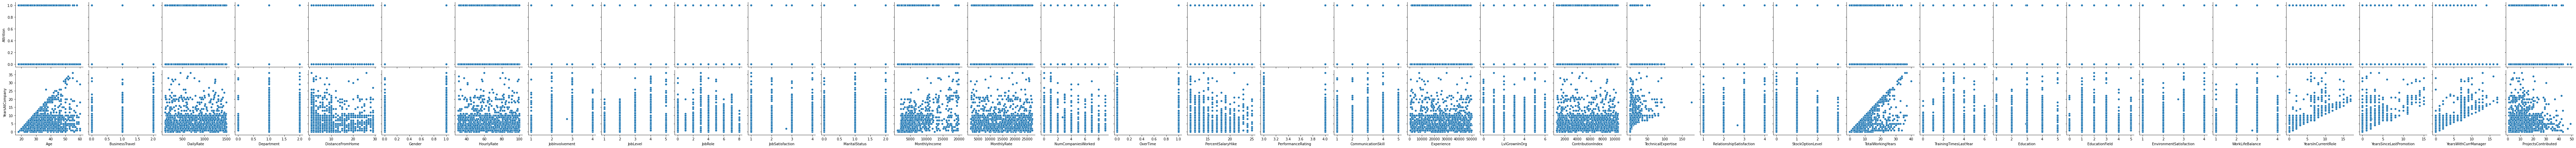

In [12]:
sb.pairplot(
    df_lencoded,
    x_vars = d.columns ,
    y_vars=["Attrition", "YearsAtCompany"],
    height = 3
)
#Double-tap

# Normalization


In [13]:
normalizer = Normalizer()
train_set_norm = normalizer.fit_transform(train_set)
train_set_norm

array([[9.10240155e-04, 4.13745525e-05, 2.84656921e-02, ...,
        6.20618288e-05, 1.24123658e-04, 3.10309144e-04],
       [1.12954135e-03, 0.00000000e+00, 3.04976164e-02, ...,
        4.51816539e-05, 2.25908270e-04, 3.16271578e-04],
       [1.26667223e-03, 4.44446396e-05, 4.66668716e-03, ...,
        0.00000000e+00, 0.00000000e+00, 6.66669594e-05],
       ...,
       [8.19648115e-04, 4.55360064e-05, 3.31502127e-02, ...,
        4.55360064e-05, 4.55360064e-05, 3.41520048e-04],
       [1.65685193e-03, 1.44074081e-04, 6.37527808e-02, ...,
        0.00000000e+00, 1.44074081e-04, 1.08055561e-03],
       [1.30926839e-03, 4.22344642e-05, 3.18447860e-02, ...,
        0.00000000e+00, 3.37875714e-04, 4.64579106e-04]])

# MinMaxScaler

In [14]:
scaler = MinMaxScaler()
train_set_scaler = scaler.fit_transform(train_set)
train_set_scaler

array([[0.61904762, 1.        , 0.91195419, ..., 0.2       , 0.35294118,
        0.29166667],
       [0.16666667, 0.        , 0.41016464, ..., 0.06666667, 0.29411765,
        0.125     ],
       [0.92857143, 1.        , 0.07730852, ..., 0.        , 0.        ,
        0.04166667],
       ...,
       [0.42857143, 1.        , 0.96921976, ..., 0.13333333, 0.11764706,
        0.29166667],
       [0.11904762, 1.        , 0.56048676, ..., 0.        , 0.11764706,
        0.29166667],
       [0.30952381, 0.5       , 0.46671439, ..., 0.        , 0.47058824,
        0.20833333]])

<IPython.core.display.Javascript object>

<AxesSubplot:>

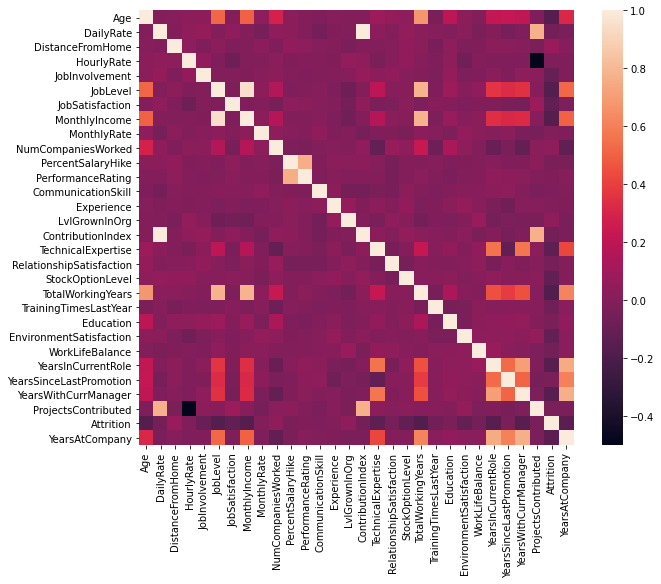

In [15]:
visualize = df_lencoded.drop(["BusinessTravel","Department","Gender","JobRole","MaritalStatus","OverTime","EducationField"], axis = 1)
visualize_scaled = pd.DataFrame(scaler.fit_transform(visualize),columns = visualize.columns, index = visualize.index)
f, ax = plt.subplots(figsize=(10, 8))
corr = visualize_scaled.corr()
sb.heatmap(corr, 
            mask=np.zeros_like(corr),
            square=True, 
            ax=ax,
           )

Mostly close to 0, indicating that there is only little linear trend


In [16]:
test_set = np.array(df_test_lencoded)
test_set_scaler = scaler.fit_transform(test_set)

<IPython.core.display.Javascript object>

In [17]:
#After testing the normalizer & minmaxscaler, the data transformation from minmax ended up with better accuracy

x_train, x_test, y_train, y_test = train_test_split(train_set_scaler, label_set_2, test_size = 0.2)
X_train, X_test, Y_train, Y_test = train_test_split(train_set_scaler, label_set_1, test_size = 0.2)

# Sklearn Models
ML Approach

In [18]:
model1 = LogisticRegression()
model1.fit(X_train,Y_train.ravel())
#model1.predict(X_test)

LogisticRegression()

In [19]:
model1.score(X_test, Y_test)
#Unusable as the predictions are binary

0.8130081300813008

In [20]:
model2 = LinearRegression()
model2.fit(x_train, y_train)
#model2.predict(x_test)

LinearRegression()

In [21]:
model2.score(x_test,y_test)
#Linear Regression is unfit for given dataset as observed from heatmap
#Also predicted negative results which should be the case for a quantity like years

0.7455586904470393

# Neural-Network 
Sklearn 

In [22]:
EPOCH = 400
model_sknn = MLPRegressor(
    hidden_layer_sizes = (35),
    activation = 'relu',
    solver = 'adam',
    alpha = 0.001,
    momentum = 0.9,
    nesterovs_momentum = True,
    learning_rate_init = 0.008,
    max_iter = EPOCH,
    verbose = True,
    validation_fraction = 0.2
)
model_sknn.fit(x_train, np.array(y_train).ravel())

<IPython.core.display.Javascript object>

Iteration 1, loss = 36.45255179
Iteration 2, loss = 23.08441273
Iteration 3, loss = 16.25520316
Iteration 4, loss = 16.78240470
Iteration 5, loss = 15.27773677
Iteration 6, loss = 13.92797417
Iteration 7, loss = 13.37609515
Iteration 8, loss = 12.34086230
Iteration 9, loss = 11.39208251
Iteration 10, loss = 10.56043076
Iteration 11, loss = 9.59114920
Iteration 12, loss = 8.69730920
Iteration 13, loss = 7.81414959
Iteration 14, loss = 7.04909261
Iteration 15, loss = 6.45059195
Iteration 16, loss = 5.87992620
Iteration 17, loss = 5.45850479
Iteration 18, loss = 5.12462366
Iteration 19, loss = 4.86290538
Iteration 20, loss = 4.63845272
Iteration 21, loss = 4.46269695
Iteration 22, loss = 4.30904616
Iteration 23, loss = 4.17117895
Iteration 24, loss = 4.09229022
Iteration 25, loss = 4.02160320
Iteration 26, loss = 3.92548556
Iteration 27, loss = 3.89360760
Iteration 28, loss = 3.82569408
Iteration 29, loss = 3.78501657
Iteration 30, loss = 3.77215190
Iteration 31, loss = 3.70664425
Iterati

Iteration 267, loss = 2.09732489
Iteration 268, loss = 2.11204270
Iteration 269, loss = 2.06487617
Iteration 270, loss = 2.11926663
Iteration 271, loss = 2.06357301
Iteration 272, loss = 2.05474627
Iteration 273, loss = 2.05252921
Iteration 274, loss = 2.09434621
Iteration 275, loss = 2.09654863
Iteration 276, loss = 2.04742632
Iteration 277, loss = 2.05174424
Iteration 278, loss = 2.06551230
Iteration 279, loss = 2.05660978
Iteration 280, loss = 2.01356901
Iteration 281, loss = 2.06402430
Iteration 282, loss = 2.06602320
Iteration 283, loss = 2.05673351
Iteration 284, loss = 2.01634511
Iteration 285, loss = 2.01564126
Iteration 286, loss = 2.01968518
Iteration 287, loss = 2.01701580
Iteration 288, loss = 1.99865543
Iteration 289, loss = 2.00038343
Iteration 290, loss = 2.01291057
Iteration 291, loss = 1.99625953
Iteration 292, loss = 2.07346830
Iteration 293, loss = 2.02555655
Iteration 294, loss = 2.07003999
Iteration 295, loss = 2.04836043
Iteration 296, loss = 2.08337714
Iteration 

MLPRegressor(alpha=0.001, hidden_layer_sizes=35, learning_rate_init=0.008,
             max_iter=400, validation_fraction=0.2, verbose=True)

In [23]:
model_sknn.score(x_test,y_test)

0.8397677451386224

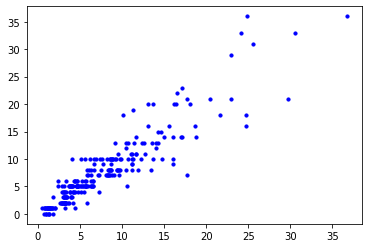

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(model_sknn.predict(x_test), y_test, s = 10, c = 'b', marker = 'o')
#Ideally straight line

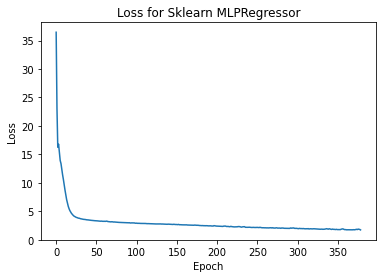

In [25]:
plt.plot(model_sknn.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss for Sklearn MLPRegressor')
plt.show()

# Neural-Network
Tensorflow

In [26]:
EP = 40
model_attr = tf.keras.Sequential()

model_attr.add(tf.keras.Input(shape=(35,)))
model_attr.add(Dense(35, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.001)))
model_attr.add(Dropout(0.5))
model_attr.add(Dense(16, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.001)))
model_attr.add(Dense(1, activation = "sigmoid"))

model_attr.compile(
    optimizer= tf.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

attr_history = model_attr.fit(
    train_set_scaler, label_set_1,
    epochs= EP,
    verbose=1,
    validation_split = 0.2)

Train on 984 samples, validate on 246 samples
Epoch 1/40
984/984 [==============================] - 1s 990us/sample - loss: 0.5227 - accuracy: 0.8293 - val_loss: 0.5360 - val_accuracy: 0.8008
Epoch 2/40
984/984 [==============================] - 0s 128us/sample - loss: 0.4738 - accuracy: 0.8496 - val_loss: 0.5258 - val_accuracy: 0.8008
Epoch 3/40
984/984 [==============================] - 0s 125us/sample - loss: 0.4620 - accuracy: 0.8496 - val_loss: 0.5123 - val_accuracy: 0.8008
Epoch 4/40
984/984 [==============================] - 0s 124us/sample - loss: 0.4433 - accuracy: 0.8496 - val_loss: 0.5027 - val_accuracy: 0.8008
Epoch 5/40
984/984 [==============================] - 0s 125us/sample - loss: 0.4434 - accuracy: 0.8496 - val_loss: 0.4972 - val_accuracy: 0.8008
Epoch 6/40
984/984 [==============================] - 0s 124us/sample - loss: 0.4358 - accuracy: 0.8496 - val_loss: 0.4930 - val_accuracy: 0.8008
Epoch 7/40
984/984 [==============================] - 0s 139us/sample - loss: 

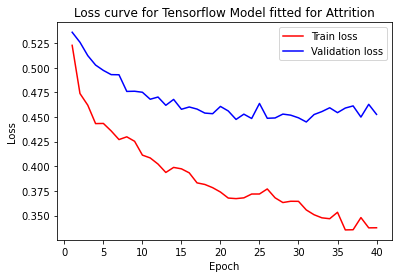

In [27]:
t_loss = attr_history.history['loss']
v_loss = attr_history.history['val_loss']
plt.plot(range(1,EP+1), t_loss, 'r', label = 'Train loss')
plt.plot(range(1,EP+1), v_loss, 'b', label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss curve for Tensorflow Model fitted for Attrition")
plt.legend()
plt.show()

In [28]:
normalize = preprocessing.Normalization() #Normalization layer for keras Sequential model
normalize.adapt(train_set_scaler)
print(normalize.mean.numpy())

[0.44751832 0.80325204 0.49501985 0.6317073  0.2940186  0.60162604
 0.5146696  0.5779767  0.2674797  0.5567073  0.5711961  0.54512197
 0.2914099  0.49362355 0.2991592  0.2813008  0.2956527  0.14471544
 0.5412602  0.5046086  0.49227014 0.49488044 0.05533998 0.5592623
 0.27073172 0.28144833 0.46747968 0.48209926 0.4512195  0.5744508
 0.5888256  0.24538498 0.14477895 0.23993304 0.2466097 ]


In [29]:
model_yac = tf.keras.Sequential()

model_yac.add(tf.keras.Input(shape=(35,)))
model_yac.add(normalize)
model_yac.add(Dense(35, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.001)))
model_yac.add(Dropout(0.5))
model_yac.add(Dense(16, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.001)))
model_yac.add(Dropout(0.5))
model_yac.add(Dense(1, activation = "linear"))

model_yac.compile(
    optimizer= tf.optimizers.Adam(learning_rate=0.001),
    loss='mse',
)

yac_history = model_yac.fit(
    train_set_scaler, label_set_2,
    epochs = 200,
    verbose=1,
    validation_split = 0.2)
#this loss is laughable

Train on 984 samples, validate on 246 samples
Epoch 1/200
984/984 [==============================] - 1s 639us/sample - loss: 67.0500 - val_loss: 58.5666
Epoch 2/200
984/984 [==============================] - 0s 123us/sample - loss: 48.2477 - val_loss: 39.5947
Epoch 3/200
984/984 [==============================] - 0s 118us/sample - loss: 40.2314 - val_loss: 25.9628
Epoch 4/200
984/984 [==============================] - 0s 117us/sample - loss: 30.4613 - val_loss: 19.4182
Epoch 5/200
984/984 [==============================] - 0s 115us/sample - loss: 27.8741 - val_loss: 15.4050
Epoch 6/200
984/984 [==============================] - 0s 116us/sample - loss: 26.5589 - val_loss: 14.7086
Epoch 7/200
984/984 [==============================] - 0s 116us/sample - loss: 27.9603 - val_loss: 14.9733
Epoch 8/200
984/984 [==============================] - 0s 119us/sample - loss: 27.5110 - val_loss: 15.1489
Epoch 9/200
984/984 [==============================] - 0s 116us/sample - loss: 26.6533 - val_loss:

984/984 [==============================] - 0s 115us/sample - loss: 14.5105 - val_loss: 11.6369
Epoch 77/200
984/984 [==============================] - 0s 115us/sample - loss: 13.8312 - val_loss: 11.5110
Epoch 78/200
984/984 [==============================] - 0s 114us/sample - loss: 13.7957 - val_loss: 11.2377
Epoch 79/200
984/984 [==============================] - 0s 120us/sample - loss: 14.2371 - val_loss: 11.4066
Epoch 80/200
984/984 [==============================] - 0s 114us/sample - loss: 14.1291 - val_loss: 10.7679
Epoch 81/200
984/984 [==============================] - 0s 115us/sample - loss: 14.5166 - val_loss: 11.2519
Epoch 82/200
984/984 [==============================] - 0s 115us/sample - loss: 13.8961 - val_loss: 10.9141
Epoch 83/200
984/984 [==============================] - 0s 114us/sample - loss: 14.7198 - val_loss: 11.4495
Epoch 84/200
984/984 [==============================] - 0s 113us/sample - loss: 14.4544 - val_loss: 11.5326
Epoch 85/200
984/984 [===================

984/984 [==============================] - 0s 116us/sample - loss: 11.8132 - val_loss: 9.9519
Epoch 152/200
984/984 [==============================] - 0s 136us/sample - loss: 12.6889 - val_loss: 10.2465
Epoch 153/200
984/984 [==============================] - 0s 147us/sample - loss: 11.6390 - val_loss: 10.0220
Epoch 154/200
984/984 [==============================] - 0s 116us/sample - loss: 10.7952 - val_loss: 9.7502
Epoch 155/200
984/984 [==============================] - 0s 117us/sample - loss: 12.3171 - val_loss: 9.1959
Epoch 156/200
984/984 [==============================] - 0s 114us/sample - loss: 9.9043 - val_loss: 9.4799
Epoch 157/200
984/984 [==============================] - 0s 114us/sample - loss: 12.7932 - val_loss: 9.9737
Epoch 158/200
984/984 [==============================] - 0s 154us/sample - loss: 11.6995 - val_loss: 10.2512
Epoch 159/200
984/984 [==============================] - 0s 127us/sample - loss: 8.8323 - val_loss: 9.9258
Epoch 160/200
984/984 [==================

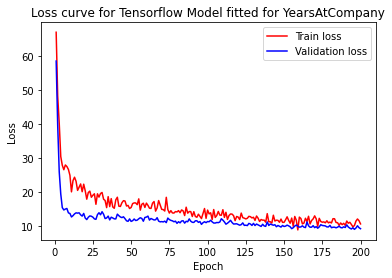

In [30]:
t_loss = yac_history.history['loss']
v_loss = yac_history.history['val_loss']
plt.plot(range(1,201), t_loss, 'r', label = 'Train loss')
plt.plot(range(1,201), v_loss, 'b', label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss curve for Tensorflow Model fitted for YearsAtCompany")
plt.legend()
plt.show()

# Creating csv
& prediction

In [31]:
attr_res = model_attr.predict(test_set_scaler)
attr_res
attr_DNN = []
for i in attr_res.tolist():
    attr_DNN.append(i[0])
#attr_DNN

In [32]:
yac_sknn = model_sknn.predict(test_set_scaler)
#yac_sknn

In [33]:
yac_res_2 = model_yac.predict(test_set_scaler)
yac_res_2.tolist()
yac_DNN = []
for i in yac_res_2.tolist():
    yac_DNN.append(i[0])
#yac_DNN

#### Result using model_attr & model_yac 
Exporting keras sequential model predictions

In [34]:
data_1 = {
    "ID" : list(range(1,len(attr_DNN)+1)),
    "Attrition" : attr_DNN,
    "YearsAtCompany" : yac_DNN
}

In [35]:
df_res = pd.DataFrame(data_1)

In [36]:
df_res

,ID,Attrition,YearsAtCompany
0,1,0.321418,4.171859
1,2,0.657219,2.994275
2,3,0.077194,3.302867
3,4,0.537955,4.246943
4,5,0.101541,3.498638
...,...,...,...
235,236,0.124930,2.775684
236,237,0.064142,5.165081
237,238,0.038667,2.806962
238,239,0.208896,4.657179


In [37]:
df_res.to_csv("Result_DNN.csv",index = False)

#### Result using model_attr & model_sknn
Exporting result using a Sklearn MLPRegressor for YearsAtCompany & the same keras Sequential model for Attrition

In [38]:
data_2 = {
    "ID" : list(range(1,len(attr_DNN)+1)),
    "Attrition" : attr_DNN,
    "YearsAtCompany" : yac_sknn
}

In [39]:
df_res = pd.DataFrame(data_2)
df_res

,ID,Attrition,YearsAtCompany
0,1,0.321418,3.375366
1,2,0.657219,2.711402
2,3,0.077194,2.987059
3,4,0.537955,6.107734
4,5,0.101541,3.493026
...,...,...,...
235,236,0.124930,1.457244
236,237,0.064142,4.491602
237,238,0.038667,5.950049
238,239,0.208896,4.357243


In [40]:
df_res.to_csv("Result_DNN_SKNN.csv",index = False)